# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dhea Rachma Febiana
- **Email:** mc006d5x2410@student.devacademy.id
- **ID Dicoding:** MC006D5X2410

## Menentukan Pertanyaan Bisnis

- Pada musim apa penyewaan sepeda mencapai angka tertinggi dan terendah selama tahun 2011-2012?
- Apa faktor-faktor yang paling memengaruhi jumlah penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan selama tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt


## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv("day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv("hour.csv")

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv memiliki satu baris per hari, sedangkan hour.csv memiliki satu baris per jam.
- Terdapat total 731 hari data, yang mencakup dua tahun (2011 dan 2012)
- Kolom season menunjukkan bahwa data mencakup semua musim. Sehingga memungkinkan analisis penyewaan sepeda berdasarkan faktor musiman.

### Assessing Data

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [13]:
print("jumlah Duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

jumlah Duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing value
- Jumlah duplikasi untuk setiap data adalah 0, berarti tidak ada data yang duplikat.

### Cleaning Data

In [14]:
day_df.drop_duplicates(inplace=True)

In [15]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [21]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])


In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [20]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

**Insight:**
- Mengonversi kolom dteday ke format datetime yang sebelumnya merupakan tipe data object. Dilakukan untuk memungkinkan analisis tren berdasarkan hari, bulan, atau tahun secara lebih efisien.
- Format datetime memudahkan pembuatan visualisasi yang berhubungan dengan waktu, yaitu seperti grafik yang menunjukkan tren penyewaan sepeda dari waktu ke waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [26]:
season_stats = day_df.groupby("season")["cnt"].agg(["mean", "median", "min", "max", "std"]).sort_values(by="mean", ascending=False)
season_stats


,mean,median,min,max,std
season,,,,,
3,5644.303191,5353.5,1115,8714,1459.800381
2,4992.331522,4941.5,795,8362,1695.977235
4,4728.162921,4634.5,22,8555,1699.615261
1,2604.132597,2209.0,431,7836,1399.942119


In [28]:
workingday_stats = day_df.groupby("workingday")["cnt"].agg(["mean", "median", "min", "max", "std"])
workingday_stats


,mean,median,min,max,std
workingday,,,,,
0,4330.168831,4459.0,605,8714,2052.141245
1,4584.820000,4582.0,22,8362,1878.415583


In [29]:
correlation_matrix = day_df[["cnt", "temp", "atemp", "hum", "windspeed", "weathersit", "workingday"]].corr()
correlation_matrix["cnt"].sort_values(ascending=False)


,cnt
cnt,1.000000
atemp,0.631066
temp,0.627494
workingday,0.061156
hum,-0.100659
windspeed,-0.234545
weathersit,-0.297391


**Insight:**
- Musim Gugur (Fall) memiliki rata-rata penyewaan tertinggi (5,644) diikuti oleh Musim Panas (Summer) (4,992), Musim Dingin (Winter) (4,728), dan Musim Semi (Spring) (2,604).
- Variabilitas penyewaan (dilihat dari standar deviasi) juga tertinggi pada musim panas dan dingin.
- Rata-rata penyewaan pada hari kerja (4,585) sedikit lebih tinggi dibandingkan dengan akhir pekan (4,330).
- Terdapat korelasi positif kuat antara jumlah penyewaan sepeda (cnt) dengan suhu (temp = 0.63) dan suhu terasa (atemp = 0.63).
- Cuaca buruk (weathersit) memiliki korelasi negatif (-0.30), menunjukkan bahwa saat cuaca buruk (hujan, kabut, salju), jumlah penyewaan sepeda cenderung turun.
- Kecepatan angin (windspeed) juga memiliki korelasi negatif (-0.23), menunjukkan bahwa semakin tinggi kecepatan angin, semakin sedikit orang yang menyewa sepeda.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

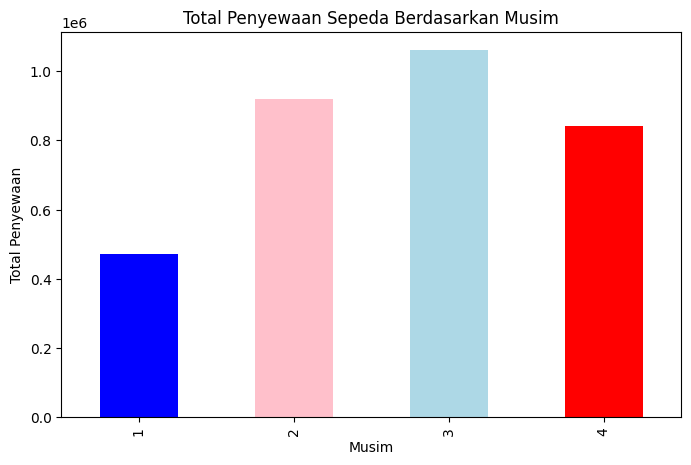

In [37]:
plt.figure(figsize=(8,5))
total_season.plot(kind="bar", color=["blue", "pink", "lightblue", "red"])
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim")
plt.show()

### Pertanyaan 2:

<ipython-input-38-8a4470dd913b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workingday_stats.index, y=workingday_stats["mean"], palette="Set1")


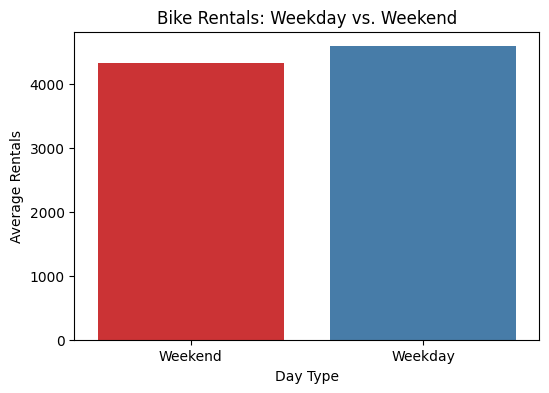

In [38]:
plt.figure(figsize=(6,4))
sns.barplot(x=workingday_stats.index, y=workingday_stats["mean"], palette="Set1")
plt.xticks(ticks=[0,1], labels=["Weekend", "Weekday"])
plt.xlabel("Day Type")
plt.ylabel("Average Rentals")
plt.title("Bike Rentals: Weekday vs. Weekend")
plt.show()



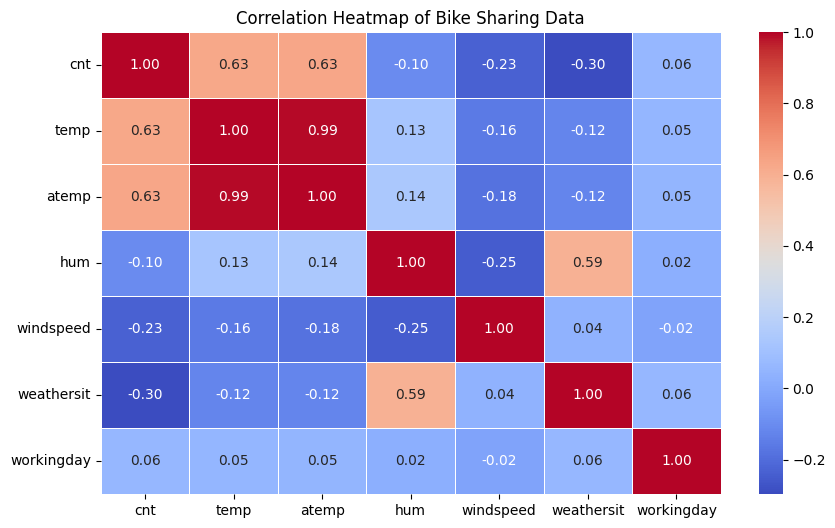

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Bike Sharing Data")
plt.show()

**Insight:**
- Musim dengan rata-rata penyewaan sepeda tertinggi adalah musim gugur (Fall) dengan 5.644 penyewaan per hari.
- Musim dengan penyewaan terendah adalah musim semi (Spring) dengan 2.604 penyewaan per hari, hampir setengah dari penyewaan pada musim gugur.
- Musim panas (Summer) dan musim dingin (Winter) memiliki jumlah penyewaan rata-rata 4.992 dan 4.728 per hari.
- Perbedaan tertinggi dalam penyewaan terjadi antara musim gugur (5.644) dan musim semi (2.604) dengan selisih 3.040 penyewaan per hari.
- Rata-rata penyewaan pada hari kerja adalah 4.584 penyewaan per hari, lebih tinggi dibandingkan dengan akhir pekan (4.330 penyewaan per hari)
- Suhu yang dirasakan (atemp) memiliki korelasi tertinggi terhadap penyewaan sepeda dengan nilai 0.63. Ini berarti semakin hangat cuaca, semakin banyak orang yang menyewa sepeda.
- Suhu sebenarnya (temp) juga memiliki korelasi tinggi sebesar 0.63, menegaskan bahwa cuaca yang lebih panas cenderung meningkatkan jumlah peminjaman sepeda.
- Kondisi cuaca (weathersit) memiliki korelasi negatif sebesar -0.30, yang berarti cuaca buruk mengurangi jumlah penyewaan.
- Kecepatan angin (windspeed) memiliki korelasi -0.23, menunjukkan bahwa angin kencang sedikit mengurangi jumlah penyewaan.
- Hari kerja (workingday) memiliki korelasi 0.06, yang menunjukkan bahwa ada sedikit perbedaan jumlah penyewaan antara hari kerja dan akhir pekan, tetapi tidak terlalu signifikan.


## Analisis Lanjutan (Opsional)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = ["temp", "atemp", "hum", "windspeed", "weathersit", "workingday"]
target = "cnt"

X = day_df[features]
y = day_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 1186.76
Mean Squared Error (MSE): 1969086.20
R-squared (R²): 0.51


## Conclusion

- Berdasarkan hasil analisis yang telah dilakukan, disimpulkan bahwa musim penyewaan tertinggi adalah musim gugur (fall), diikuti oleh musim panas (Summer), musim dingin (Winter), dan terakhir yang terendah adalah musim semi (Spring). Penyewaan sepeda yang tinggi pada musim gugur(fall) dapat disebabkan oleh kondisi cuaca yang lebih nyaman dibandingkan musim lainnya.
- Perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan tidak terlalu signifikan, meskipun penyewaan sedikit lebih tinggi pada hari kerja. Faktor yang paling memengaruhi jumlah penyewaan sepeda adalah suhu (temp & atemp), kondisi cuaca (weathersit), kecepatan angin (windspeed), dan kelembaban (hum). Semakin tinggi suhu, jumlah penyewaan meningkat, sementara cuaca buruk dan angin kencang cenderung mengurangi penyewaan sepeda. Korelasi antara hari kerja dan jumlah penyewaan terbilang rendah, sehingga faktor cuaca lebih berpengaruh dibandingkan apakah hari tersebut merupakan hari kerja atau akhir pekan.

In [42]:
!pip freeze > requirements.txt


In [43]:
from google.colab import files
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>